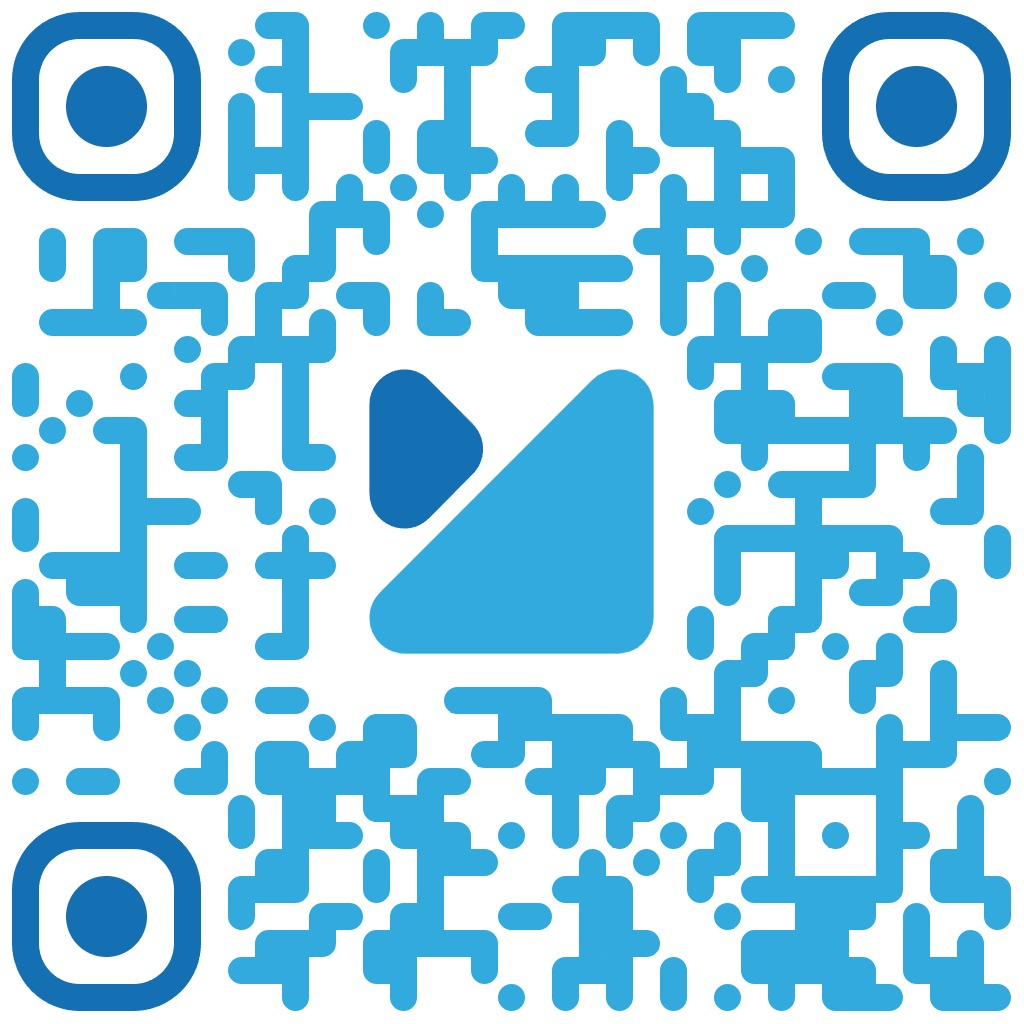

# Необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import timeit

# ***Numpy, pandas | предобработка данных***
Занятие 04.04.25, ауд. 413


# Введение

**Обработка данных** — фундамент машинного обучения. Без умения эффективно работать с данными даже самая сложная модель не даст качественных результатов. На этом занятии вы познакомитесь с двумя ключевыми инструментами Python для работы с данными: NumPy и Pandas. Мы разберем, как выполнять предобработку данных, проводить первичный анализ (EDA) и оптимизировать вычисления. Вы узнаете:

* Почему NumPy в десятки раз быстрее стандартных списков Python.

* Как Pandas упрощает работу с табличными данными, включая фильтрацию, агрегацию и очистку.

* Какие шаги включает начальный этап EDA и как визуализировать данные для выявления паттернов.

* Как применять эти навыки на реальных данных (на примере датасета Titanic).

# Numpy



**Python list VS Numpy array**

In [2]:
# Создаем большие массивы/списки (1 млн элементов)
py_list1 = [i for i in range(1000000)]
py_list2 = [i**2 for i in range(1000000)]
np_array1 = np.arange(1000000)
np_array2 = np.arange(1000000)**2

In [3]:
# Тест для стандартных списков Python
start_time = timeit.default_timer()
result_py = [a * b for a, b in zip(py_list1, py_list2)]
py_time = timeit.default_timer() - start_time

In [4]:
# Тест для NumPy
start_time = timeit.default_timer()
result_np = np_array1 * np_array2
np_time = timeit.default_timer() - start_time

In [5]:
print(f"Python списки: {py_time:.5f} сек")
print(f"NumPy массивы: {np_time:.5f} сек")
print(f"NumPy быстрее в {py_time/np_time:.1f} раз!")
assert np.allclose(result_np, np.array(result_py)), "Результаты не совпадают!"

Python списки: 0.06146 сек
NumPy массивы: 0.00296 сек
NumPy быстрее в 20.7 раз!


Почему так происходит:

* NumPy использует векторизованные операции на C-уровне

* Отсутствие накладных расходов на интерпретацию Python

* Оптимизированное хранение данных в памяти

Есть еще много преимуществ numpy, которые делают его лучшим инструментом для работы с числовыми массивами на python. Давайте перейдем к его изучению, для этого необходимо открыть соответсвующее занятие в мирэре

**Создание массивов**

In [6]:
?np.array

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

In [7]:
np.array([100, 30, 5000, 1000], dtype='int8')

OverflowError: Python integer 5000 out of bounds for int8

In [ ]:
a = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]]])
a

In [8]:
a[0,1,1], a[0][1][1]

NameError: name 'a' is not defined

**Многомерные массивы**

**Оси в многомерном массиве**

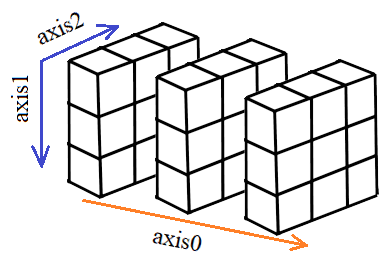

Полезеные функции для работы с массивами

**Полезеные функции создания массивов**

| **Название**      | **Описание**                                                                                     |
|--------------------|-------------------------------------------------------------------------------------------------|
| `empty(shape, …)`  | Возвращает новый массив заданного размера и типа данных, но **без инициализации значений** (значения в памяти случайные). |
| `eye(N, M=None, …)`| Создает массив размером `NxM` с **единицами на главной диагонали**, остальные элементы — нули. Если `M` не указан, массив квадратный (`NxN`). |
| `identity(n, …)`   | Возвращает **квадратный массив** размером `nxn` с единицами **только на главной диагонали**, остальные — нули. |
| `ones(shape, …)`   | Создает массив заданного размера и типа, заполненный **единицами**.                            |
| `zeros(shape, …)`  | Создает массив заданного размера и типа, заполненный **нулями**.                               |
| `full(shape, value, …)` | Возвращает массив заданного размера и типа, где **все элементы** равны указанному значению `value`. |

| **Название**              | **Описание**                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------|
| `mat(object, ...)`         | Преобразует входные данные (`object`: строка, список, кортеж) в матрицу NumPy.                  |
| `diag(list, ...)`          | Создает **диагональную матрицу** из списка или массива. Возвращает копию данных (не представление). |
| `diagflat(list, ...)`      | Создает **двумерную диагональную матрицу** из списка, предварительно сжимая его до одномерного массива. |
| `tri(N, M=None, ...)`      | Генерирует **нижнюю треугольную матрицу** размером `NxM` с единицами на главной диагонали и ниже. |
| `tril(list, ...)`          | Преобразует двумерный массив/список `list` в **нижнюю треугольную матрицу** (нули выше диагонали). |
| `triu(list, ...)`          | Преобразует двумерный массив/список `list` в **верхнюю треугольную матрицу** (нули ниже диагонали). |
| `vander(list, N=None, ...)`| Создает **матрицу Вандермонда** из одномерного массива `list`. Параметр `N` задает количество столбцов (по умолчанию — длина `list`). |

Пояснения:

* shape — кортеж, определяющий размерность массива (например, (3, 4) для матрицы 3x4).

* N, M — целые числа, задающие размеры массива.

* value — значение, которым заполняется массив в full().

* Все функции принимают параметр dtype для указания типа данных (по умолчанию float64).

**Изменение формы массива**

In [ ]:
a = np.arange(10)  # [0, 1, ..., 9]
a.shape = (2, 5)   # Массив 2x5

Изменяет текущий массив. Если размеры несовместимы (например, 3x3 для 10 элементов), возникнет ошибка.

In [ ]:
b = a.reshape(5, 2)  # Новый массив 5x2 (данные общие с массивом a!)

Создает новое представление тех же данных. Используйте -1 для автоматического расчета размерности:

In [ ]:
a.reshape(-1, 2)  # 5x2
a.reshape(2, -1)   # 2x5

**Преобразование в одномерный массив**

In [ ]:
c = b.ravel()  # Одномерный массив (новое представление).

Меняет размер массива, добавляя/удаляя элементы:

In [ ]:
a.resize(4, 5, refcheck=False)  # 4x5 (добавляет нули).

Осторожно: refcheck=False может привести к потере данных.

**Добавление и удаление осей**

In [ ]:
x = np.arange(10)
x_new = np.expand_dims(x, axis=0)  # Добавляет ось (1, 10).

In [ ]:
y = np.squeeze(x_new)  # (10,) удаляет ось c одним элементом.

In [ ]:
x_col = x[:, np.newaxis]  # Вектор-столбец (10, 1) удобное добавление осей.

 **Объединение массивов**

**hstack и vstack**
объединяют массивы по горизонтали (axis=1) и вертикали (axis=0).

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
np.hstack([a, b])  # 2x4
np.vstack([a, b])  # 4x2

Условие: размеры по объединяемым осям должны совпадать.

* column_stack и row_stack

 *  column_stack объединяет одномерные массивы в столбцы (аналог hstack для 2D).

  * row_stack аналогичен vstack.

**concatenate**
объединяет массивы вдоль любой указанной оси:

In [ ]:
np.concatenate([a, b], axis=0)  # по axis0
np.concatenate([a, b], axis=1)  # по axis1

Объекты **r_ и c_**
упрощают создание и объединение массивов:

In [ ]:
np.r_[ [1,2,3], [4,5,6] ]  # [1,2,3,4,5,6]
np.c_[ [1,2,3], [4,5,6] ]  # [[1,4], [2,5], [3,6]]

**Разделение массивов**

**hsplit и vsplit**
делят массивы по горизонтали (axis=1) и вертикали (axis=0):

In [ ]:
a = np.arange(10)
np.hsplit(a, 2)  # 2 массива по 5 элементов
a_col = a.reshape(-1, 1)
np.vsplit(a_col, 2)  # 2 массива 5x1

Ошибка: если элементы нельзя разделить поровну.

**array_split**
разделяет массив по любой оси (можно указать неравное деление):

In [ ]:
a = np.arange(18).reshape(3,3,2)
np.array_split(a, 2, axis=2)  # разделение по третьей оси

**Булевы маски и операции**

In [ ]:
a = np.arange(10)
print(a)
a[a>5]

[0 1 2 3 4 5 6 7 8 9]


array([6, 7, 8, 9])

Логика работает как в питоне

**Значения -inf, inf и nan**

**Функции isnan и isinf**

**Матричное унможение**

Функции:

* np.dot(a, b) — классическое матричное умножение (устаревший вариант).

* np.matmul(a, b) — предпочтительный метод для матриц (учитывает размерности).

* Оператор @ — синтаксический сахар для np.matmul

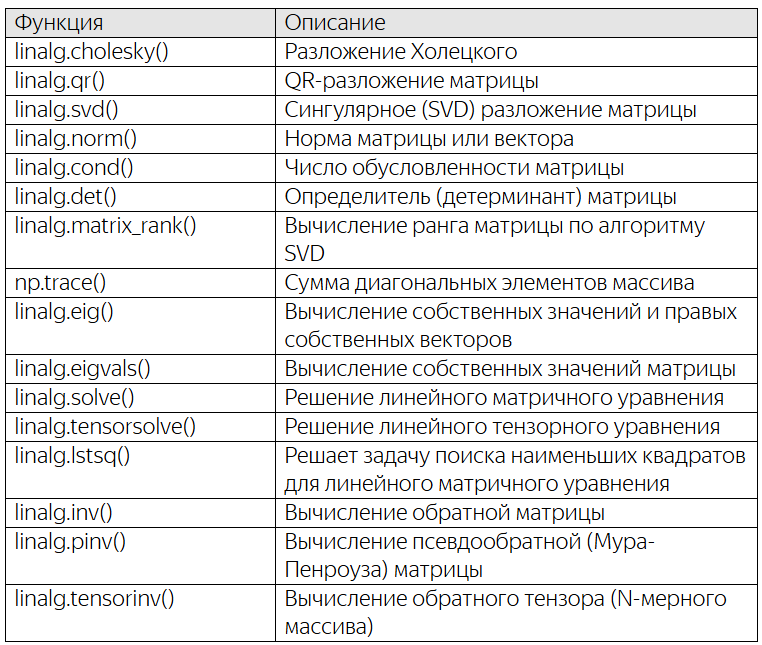

Для более подробного знакомства с библиотекой советую изучить [документацию numpy](https://numpy.org/devdocs/)

# Pandas

**Python list/dict vs Pandas DataFrame**

В мире данных таблицы — повсеместный формат: CSV, Excel, SQL-запросы. Чистый Python справляется с такими данными, но код становится громоздким и медленным. Pandas превращает обработку таблиц в интуитивный и эффективный процесс:

* DataFrame — двумерная таблица с индексами, названиями столбцов и поддержкой разнотипных данных.

* Интеграция с NumPy — под капотом массивы NumPy, что обеспечивает скорость.

* Встроенные методы для фильтрации, агрегации, обработки пропусков и слияния таблиц.

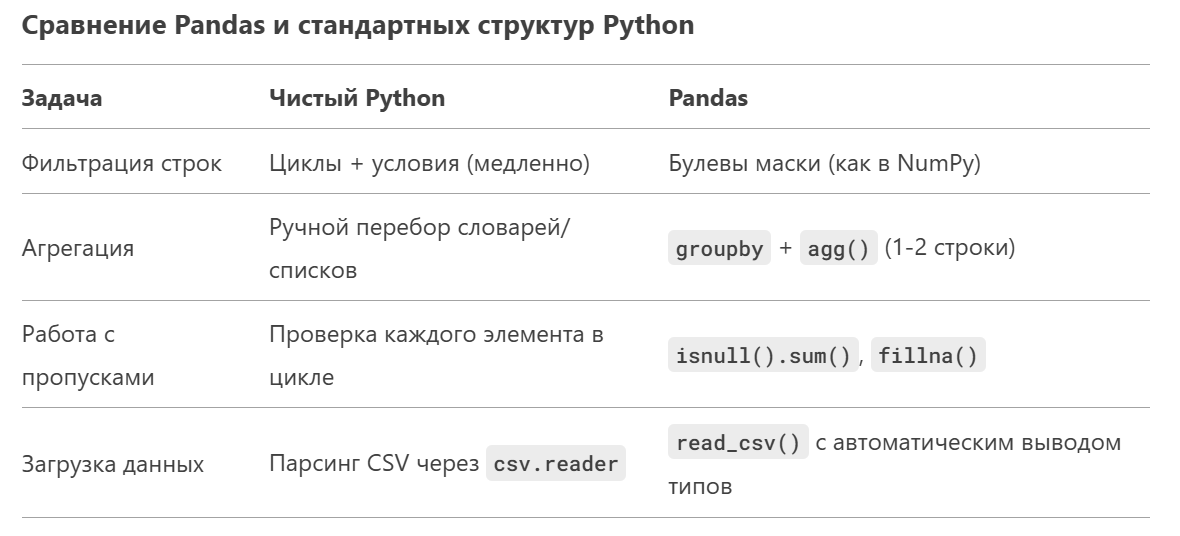

**Итог:**

* Pandas экономит часы рутинной работы.

* Код становится читаемым и лаконичным.

* Возможность обрабатывать гигабайты данных за счет оптимизации под капотом.

Теперь попрактикуемся на реальных данных! 📊



**Введение**

**DataFrame** — это двумерная табличная структура данных в библиотеке Pandas, предназначенная для работы с табличными данными (аналогия Excel или SQL).

Столбцы могут содержать данные разных типов (числа, строки, даты).

Строки индексируются (по умолчанию: 0, 1, 2, ...) или могут иметь пользовательские метки.

Основные возможности: фильтрация, сортировка, группировка, агрегация, визуализация.

**Создание DataFrame**

In [9]:
import pandas as pd

data = {
    'Имя': ['Анна', 'Борис', 'Мария'],
    'Возраст': [25, 30, 28],
    'Город': ['Москва', 'Санкт-Петербург', 'Казань']
}

df = pd.DataFrame(data)
print(df)

     Имя  Возраст            Город
0   Анна       25           Москва
1  Борис       30  Санкт-Петербург
2  Мария       28           Казань


**Полезные функции в pandas**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Загрузка данных (пример с датасетом Titanic)
df = sns.load_dataset('titanic')

In [11]:
# Первые 5 строк:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
# Статистика по числовым колонкам
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Статистика по категориальным колонкам
df.describe(include=['object', 'category'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [15]:
# Пропущенные значения
df.isnull() # .sum() можно добавить, чтобы получить общее количество пропусков

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


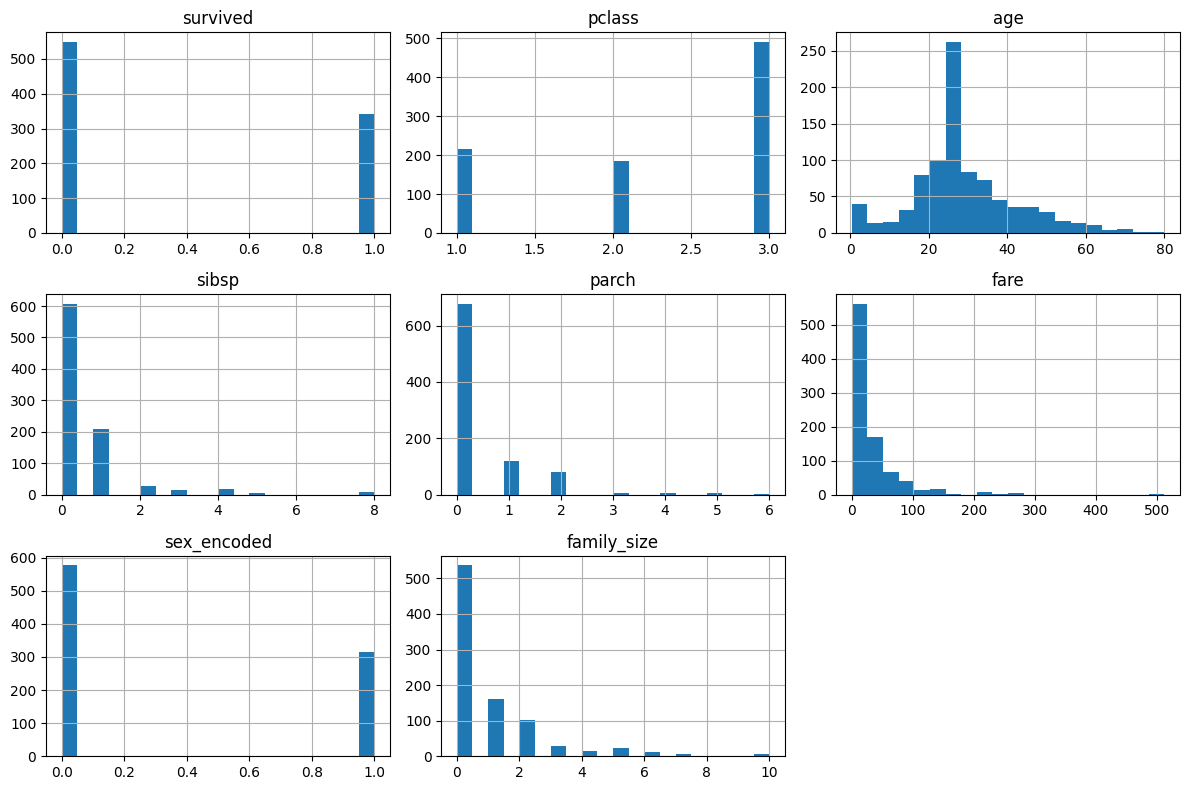

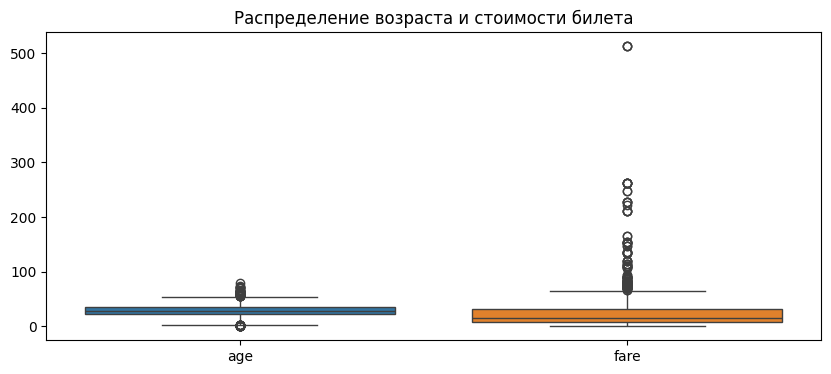


Уникальные значения в колонке 'sex':


sex
male      577
female    314
Name: count, dtype: int64


Распределение классов пассажиров:


class
Third     55.1%
First     24.2%
Second    20.7%
Name: proportion, dtype: object

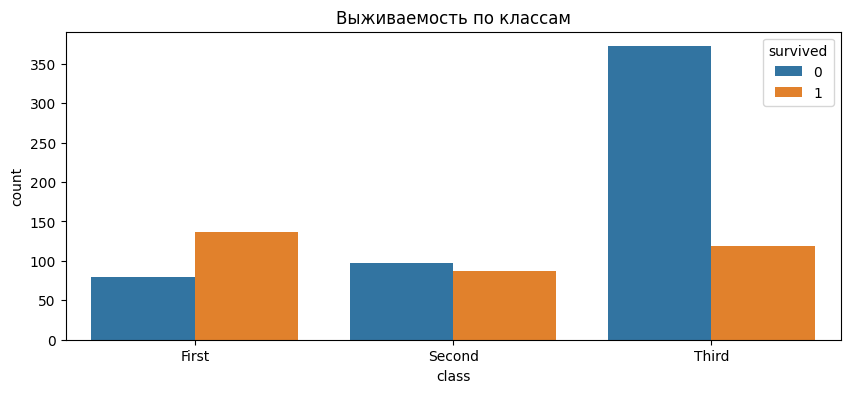

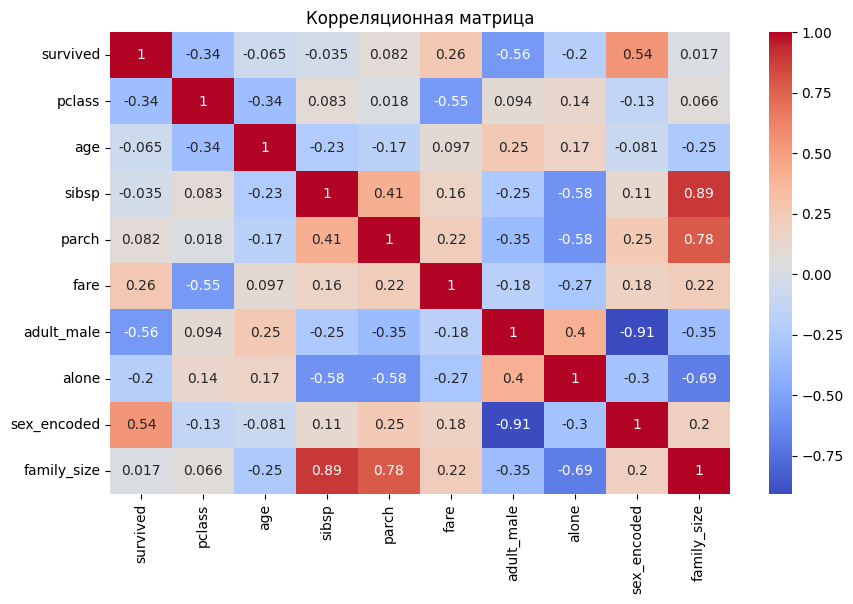

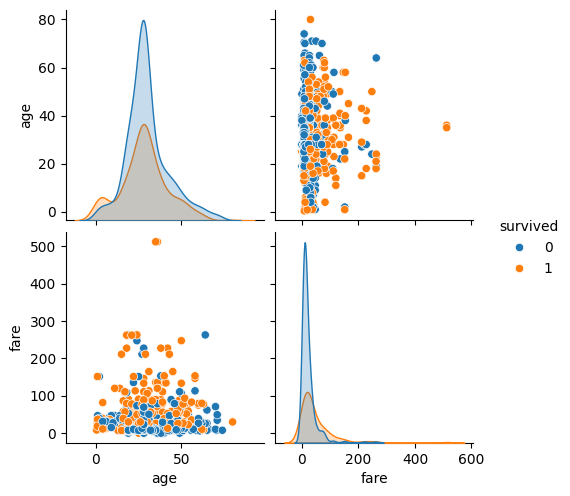


Обновленная таблица после преобразований:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_encoded,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0


In [17]:
# --------------------------
# 3. Анализ распределений
# --------------------------
# Гистограммы для числовых признаков
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Boxplot для анализа выбросов
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['age', 'fare']])
plt.title('Распределение возраста и стоимости билета')
plt.show()

# --------------------------
# 4. Анализ категориальных данных
# --------------------------
print("\nУникальные значения в колонке 'sex':")
display(df['sex'].value_counts())

print("\nРаспределение классов пассажиров:")
display(df['class'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Визуализация категориальных данных
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='class', hue='survived')
plt.title('Выживаемость по классам')
plt.show()

# --------------------------
# 5. Корреляции
# --------------------------
# Тепловая карта корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Парные распределения
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()

# --------------------------
# 6. Полезные фичи
# --------------------------
# Пример обработки категориальных данных
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})

# Пример заполнения пропусков
df['age'] = df['age'].fillna(df['age'].median())

# Пример создания нового признака
df['family_size'] = df['sibsp'] + df['parch']

print("\nОбновленная таблица после преобразований:")
display(df.head())

Для более подробного знакомства с библиотекой советую изучить [документацию pandas](https://pandas.pydata.org/docs/)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

pd.set_option('display.max_columns', 13)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 45)
pd.set_option('display.width', 80)

data = pd.read_csv('titanic.csv', index_col='passenger_id')

data['age'].fillna(value=data['age'].median(), inplace = True)
data.drop(['cabin'], 1, inplace = True)
data['embarked'].fillna(value="C", inplace = True)

for col in data:
    if data[col].dtype == 'object':
        print(col, len(list(data[col].unique())))

data.drop(['name', 'ticket'], 1, inplace=True)
data['gender'] = data['gender'].map({'male': 0, 'female': 1})

lb = LabelBinarizer()
lb.fit(data['embarked'])
cat_lb = lb.transform(data['embarked'])

a = pd.DataFrame(cat_lb, index=data.index)
a.rename(columns={0: 'From_Cherbourg', 1: 'From_Queenstown', 2: 'From_Southampton'}, inplace=True)

data = pd.concat([data, a], axis=1)

data.drop(['embarked'], 1, inplace=True)

print(data.head())

/var/folders/rb/n9c936r124x9c6nvngd4bbpc0000gn/T/ipykernel_44573/2445960465.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(value=data['age'].median(), inplace = True)


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given